<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000
torch.Size([1, 28, 28]) 9


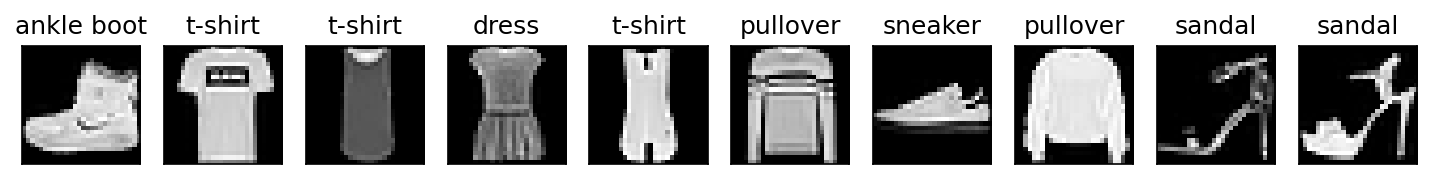

2.06 sec


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

# 设置matplotlib
def use_svg_display():
    plt.rcParams['figure.figsize'] = (3.5, 2.5)
    plt.rcParams['figure.dpi'] = 150

def show_fashion_mnist(images, labels):
    use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    if len(images) == 1:
        figs = [figs]
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.squeeze().numpy(), cmap='gray')
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

# 下载并加载Fashion-MNIST数据集
mnist_train = torchvision.datasets.FashionMNIST(
    root='./Datasets/FashionMNIST',
    train=True, download=True, transform=transforms.ToTensor()
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='./Datasets/FashionMNIST',
    train=False, download=True, transform=transforms.ToTensor()
)

print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

feature, label = mnist_train[0]
print(feature.shape, label)

# 显示前10个样本
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

# 数据加载器
batch_size = 256
train_iter = torch.utils.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=0
)
test_iter = torch.utils.data.DataLoader(
    mnist_test, batch_size=batch_size, shuffle=False, num_workers=0
)

# 计时
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

In [9]:
#读取小批量
batch_size = 256
if sys.platform.startswith('win'):
 num_workers = 0 # 0表示不不⽤用额外的进程来加速读取数据
else:
 num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train,
batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test,
batch_size=batch_size, shuffle=False, num_workers=num_workers)
start = time.time()
for X, y in train_iter:
 continue
print('%.2f sec' % (time.time() - start))

8.96 sec
